# Logistic Regression

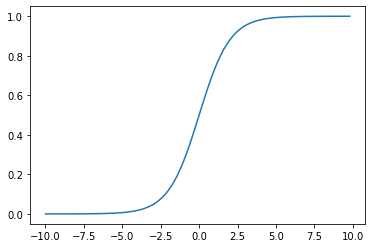

In [39]:
import math
import matplotlib.pyplot as plt
import numpy as np

def sigmoid(x):
    "this function takes numpy array and passes it through Sigmoid function."
    a = []
    for item in x:
        a.append(1/(1+math.exp(-item)))
    return a

# creating an array 
x = np.arange(-10., 10., 0.2)
sig = sigmoid(x)
plt.plot(x,sig)
plt.show()

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

### Loading data

In [2]:
data = sns.load_dataset("iris")
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


### Data Visualisation

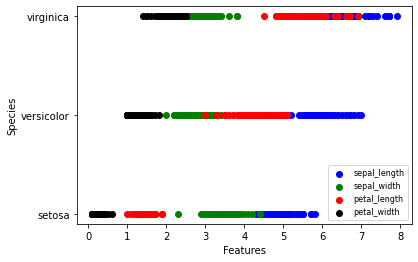

In [3]:
plt.xlabel('Features')
plt.ylabel('Species')

pltX = data.loc[:, 'sepal_length']
pltY = data.loc[:,'species']
plt.scatter(pltX, pltY, color='blue', label='sepal_length')

pltX = data.loc[:, 'sepal_width']
plt.scatter(pltX, pltY, color='green', label='sepal_width')

pltX = data.loc[:, 'petal_length']
plt.scatter(pltX, pltY, color='red', label='petal_length')

pltX = data.loc[:, 'petal_width']
plt.scatter(pltX, pltY, color='black', label='petal_width')

plt.legend(loc=4, prop={'size':8})
plt.show()

### Prepare the training set

In [4]:
# X = feature values, all the columns except the last column
X = data.iloc[:, :-1]

# y = target values, last column of the data frame
y = data.iloc[:, -1]

#Split the data into 80% training and 20% testing
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Training the model

In [5]:
#Train the model
model = LogisticRegression(solver='liblinear')
model.fit(x_train, y_train)

LogisticRegression(solver='liblinear')

### Predicting from model

In [6]:
#Test the model
predictions = model.predict(x_test)
print(predictions)# printing predictions


#Check precision, recall, f1-score
print('classification_report\n', classification_report(y_test, predictions) )

print('accuracy_score', accuracy_score(y_test, predictions))

['versicolor' 'setosa' 'virginica' 'versicolor' 'versicolor' 'setosa'
 'versicolor' 'virginica' 'versicolor' 'versicolor' 'virginica' 'setosa'
 'setosa' 'setosa' 'setosa' 'versicolor' 'virginica' 'versicolor'
 'versicolor' 'virginica' 'setosa' 'virginica' 'setosa' 'virginica'
 'virginica' 'virginica' 'virginica' 'virginica' 'setosa' 'setosa']
classification_report
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

accuracy_score 1.0


## Model Deployment techniques

### pickle

In [7]:
#For deployment in pickle format
import pickle

#saving model
with open('logistic_regression.pkl', 'wb') as pickle_out:
    pickle.dump(model, pickle_out)
    
#loading and predicting with model
with open('logistic_regression.pkl', 'rb') as pickle_in:
    pkl_model_loaded = pickle.load(pickle_in)
    
#Predicted ith loaded models
prediction_data = {'sepal_length':[5.1], 'sepal_width':[3.5], 'petal_length':[1.4], 'petal_width':[0.2]}
prediction_df = pd.DataFrame(prediction_data)
predicted = pkl_model_loaded.predict(prediction_df)
print(predicted)

['setosa']


### pmml

pmml file can be easily read from Java

In [8]:
from sklearn2pmml import PMMLPipeline, sklearn2pmml
from sklearn2pmml.decoration import ContinuousDomain
from sklearn_pandas import DataFrameMapper
from sklearn.impute import SimpleImputer

pipeline = PMMLPipeline([
    ("mapper", DataFrameMapper([
        (["sepal_length", "sepal_width", "petal_length", "petal_width"], [ContinuousDomain(), SimpleImputer()])
    ])),
    
    ("classifier", LogisticRegression(solver='liblinear', multi_class='ovr'))
])
pipeline.fit(x_train, y_train)



sklearn2pmml(pipeline, "LogisticRegressionIris.pmml", with_repr = True)

K:\MachineLearning\logistic_regression\venv\lib\site-packages\sklearn\base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


### pmml file can also be read using pypmml

In [9]:
from pypmml import Model
pmml_model = Model.fromFile('LogisticRegressionIris.pmml')
result = pmml_model.predict({
    "sepal_length" : 5.1,
    "sepal_width" : 3.5,
    "petal_length" : 1.4,
    "petal_width" : 0.2
})
result

{'probability(setosa)': 0.8723730452994222, 'probability(virginica)': 1.9548453220912738e-05, 'probability(versicolor)': 0.127607406247357}

### Check feature importance of your model

This is quite helpful in knowing your model and how it calculated a target.

Text(0, 0.5, 'feature importance')

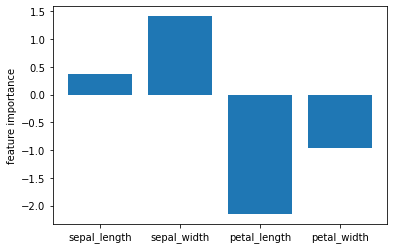

In [30]:
feature_importance = model.coef_
feature_imp = pd.DataFrame(feature_importance, columns=["sepal_length", "sepal_width", "petal_length", "petal_width"], index=['setosa', 'virginica', 'versicolor'])
plt.bar(feature_imp.columns, height=feature_imp.loc['setosa'])
plt.ylabel("feature importance")

<BarContainer object of 4 artists>

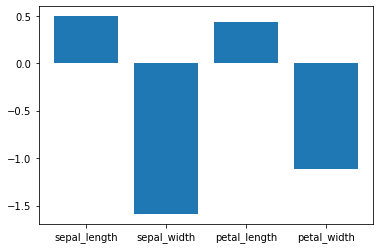

In [31]:
plt.bar(feature_imp.columns, height=feature_imp.loc['virginica'])

<BarContainer object of 4 artists>

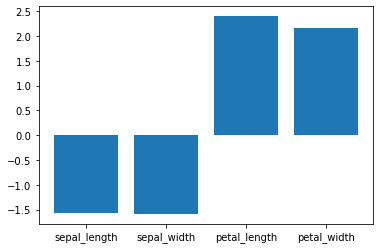

In [32]:
plt.bar(feature_imp.columns, height=feature_imp.loc['versicolor'])